In [1]:
import pandas as pd
import numpy as np

from sqlalchemy.engine import URL
from sqlalchemy import create_engine

connection_string = 'DRIVER={SQL Server};SERVER=LAPTOP-2T0TBBUP\SQLEXPRESS;DATABASE=MoviesDB;Trusted_Connection=yes'
connection_url = URL.create("mssql+pyodbc", query={"odbc_connect": connection_string})
engine = create_engine(connection_url)
query = "SELECT * FROM analysisUpgraded"
movies = pd.read_sql(query, engine)

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8280 entries, 0 to 8279
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8280 non-null   object 
 1   Genres           8280 non-null   object 
 2   RatingName       8280 non-null   object 
 3   Year             8280 non-null   int64  
 4   OscarWinSum      8280 non-null   int64  
 5   NominatedNumber  8280 non-null   int64  
 6   Gross            7387 non-null   float64
 7   Budget           7387 non-null   float64
 8   DurationMinutes  8267 non-null   float64
 9   VotesNumber      8204 non-null   float64
 10  imbdScore        8252 non-null   float64
 11  Nudity           8280 non-null   int64  
 12  Violence         8280 non-null   int64  
 13  Profanity        8280 non-null   int64  
 14  Alcohol          8280 non-null   int64  
 15  Frightening      8280 non-null   int64  
dtypes: float64(5), int64(8), object(3)
memory usage: 1.0+ MB


In [2]:
movies.head()

,Name,Genres,RatingName,Year,OscarWinSum,NominatedNumber,Gross,Budget,DurationMinutes,VotesNumber,imbdScore,Nudity,Violence,Profanity,Alcohol,Frightening
0,#Saraitda,Action-Drama-Horror,TV-MA,2020,0,0,NaN,NaN,98.0,32671.0,6.3,0,2,1,1,2
1,(500) Days of Summer,Romance-Drama-Comedy,PG-13,2009,0,0,NaN,NaN,95.0,489549.0,7.7,1,1,2,1,0
2,*batteries not included,Comedy,PG,1987,0,0,65088797.0,25000000.0,106.0,32000000.0,6.7,0,0,0,0,0
3,[Rec],Thriller-Horror-Mystery,R,2007,0,0,NaN,NaN,78.0,172050.0,7.4,1,3,3,0,3
4,[Rec]²,Horror,R,2009,0,0,18853164.0,5600000.0,85.0,70000000.0,6.5,0,0,0,0,0


Перевіримо, чи має дата фрейм пропущені значення:

In [3]:
movies.isnull().values.any()

True

Тепер перевіримо наявність від'ємних значень:

In [4]:
(movies.select_dtypes(include=np.number) < 0).values.any()

False

<AxesSubplot:>

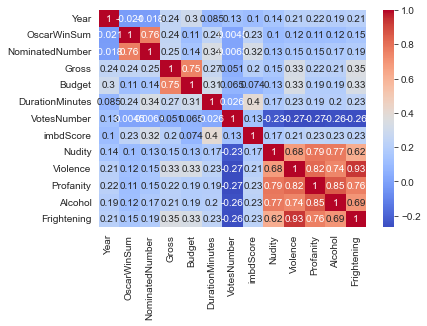

In [10]:
import seaborn as sb

corr = movies[['Year', 'OscarWinSum', 'NominatedNumber', 'Gross', 'Budget', 'DurationMinutes', 'VotesNumber', 'imbdScore', 'Nudity', 'Violence', 'Profanity', 'Alcohol', 'Frightening']].corr()
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sb.color_palette("coolwarm", as_cmap=True))



<AxesSubplot:>

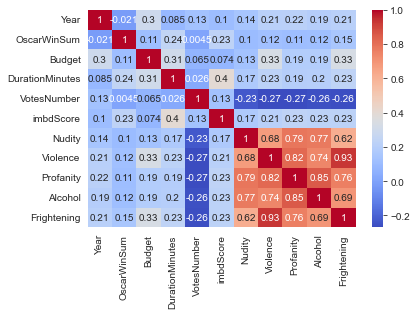

In [13]:
# movies.drop(['NominatedNumber', 'Gross'], axis=1, inplace=True)

corr = movies[['Year', 'OscarWinSum', 'Budget', 'DurationMinutes', 'VotesNumber', 'imbdScore', 'Nudity', 'Violence', 'Profanity', 'Alcohol', 'Frightening']].corr()
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sb.color_palette("coolwarm", as_cmap=True))

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
movies = movies.loc[movies['Budget'].notna() != 0]
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7387 entries, 2 to 8278
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7387 non-null   object 
 1   Genres           7387 non-null   object 
 2   RatingName       7387 non-null   object 
 3   Year             7387 non-null   int64  
 4   OscarWinSum      7387 non-null   int64  
 5   Budget           7387 non-null   float64
 6   DurationMinutes  7387 non-null   float64
 7   VotesNumber      7387 non-null   float64
 8   imbdScore        7387 non-null   float64
 9   Nudity           7387 non-null   int64  
 10  Violence         7387 non-null   int64  
 11  Profanity        7387 non-null   int64  
 12  Alcohol          7387 non-null   int64  
 13  Frightening      7387 non-null   int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 865.7+ KB


In [16]:
numeric_columns = movies.select_dtypes(include=['number']).columns

means = movies[numeric_columns].mean()

movies[numeric_columns] = movies[numeric_columns].fillna(means)

movies.dropna(inplace=True)

movies.info()
movies.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7387 entries, 2 to 8278
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7387 non-null   object 
 1   Genres           7387 non-null   object 
 2   RatingName       7387 non-null   object 
 3   Year             7387 non-null   int64  
 4   OscarWinSum      7387 non-null   int64  
 5   Budget           7387 non-null   float64
 6   DurationMinutes  7387 non-null   float64
 7   VotesNumber      7387 non-null   float64
 8   imbdScore        7387 non-null   float64
 9   Nudity           7387 non-null   int64  
 10  Violence         7387 non-null   int64  
 11  Profanity        7387 non-null   int64  
 12  Alcohol          7387 non-null   int64  
 13  Frightening      7387 non-null   int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 865.7+ KB


,Name,Genres,RatingName,Year,OscarWinSum,Budget,DurationMinutes,VotesNumber,imbdScore,Nudity,Violence,Profanity,Alcohol,Frightening
2,*batteries not included,Comedy,PG,1987,0,25000000.0,106.0,32000000.0,6.7,0,0,0,0,0
4,[Rec]²,Horror,R,2009,0,5600000.0,85.0,70000000.0,6.5,0,0,0,0,0
6,10 Cloverfield Lane,Action-Drama-Horror,PG-13,2016,0,15000000.0,103.0,306304.0,7.2,0,2,1,1,3
7,10 Things I Hate About You,Romance-Drama-Comedy,PG-13,1999,0,30000000.0,97.0,315247.0,7.3,1,1,1,1,0
8,10 to Midnight,Crime,R,1983,0,4520000.0,101.0,7200000.0,6.3,0,0,0,0,0


In [27]:

X = movies[['Year', 'Genres', 'OscarWinSum', 'Budget', 'DurationMinutes', 'VotesNumber', 'RatingName', 'Nudity', 'Violence', 'Profanity', 'Alcohol', 'Frightening']] # 'RatingName' # 'Month' 'NominatedNumber', 'Gross' 'Year'
Y = movies[['imbdScore']]



In [28]:
res = X['Genres'].str.get_dummies(sep='-').add_prefix('genres_')

X = pd.concat([X, res], axis = 1)
X.drop(columns=['Genres'], inplace=True)
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7387 entries, 2 to 8278
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              7387 non-null   int64  
 1   OscarWinSum       7387 non-null   int64  
 2   Budget            7387 non-null   float64
 3   DurationMinutes   7387 non-null   float64
 4   VotesNumber       7387 non-null   float64
 5   RatingName        7387 non-null   object 
 6   Nudity            7387 non-null   int64  
 7   Violence          7387 non-null   int64  
 8   Profanity         7387 non-null   int64  
 9   Alcohol           7387 non-null   int64  
 10  Frightening       7387 non-null   int64  
 11  genres_Action     7387 non-null   int64  
 12  genres_Adventure  7387 non-null   int64  
 13  genres_Animation  7387 non-null   int64  
 14  genres_Biography  7387 non-null   int64  
 15  genres_Comedy     7387 non-null   int64  
 16  genres_Crime      7387 non-null   int64  


,Year,OscarWinSum,Budget,DurationMinutes,VotesNumber,RatingName,Nudity,Violence,Profanity,Alcohol,...,genres_Mystery,genres_Reality,genres_Romance,genres_Sci,genres_Show,genres_Sport,genres_TV,genres_Thriller,genres_War,genres_Western
2,1987,0,25000000.0,106.0,32000000.0,PG,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2009,0,5600000.0,85.0,70000000.0,R,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2016,0,15000000.0,103.0,306304.0,PG-13,0,2,1,1,...,0,0,0,0,0,0,0,0,0,0
7,1999,0,30000000.0,97.0,315247.0,PG-13,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
8,1983,0,4520000.0,101.0,7200000.0,R,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
ageRating = X['RatingName'].str.get_dummies().add_prefix('AgeRating_')

X = pd.concat([X, ageRating], axis = 1)
X.drop(columns=['RatingName'], inplace=True)
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7387 entries, 2 to 8278
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                7387 non-null   int64  
 1   OscarWinSum         7387 non-null   int64  
 2   Budget              7387 non-null   float64
 3   DurationMinutes     7387 non-null   float64
 4   VotesNumber         7387 non-null   float64
 5   Nudity              7387 non-null   int64  
 6   Violence            7387 non-null   int64  
 7   Profanity           7387 non-null   int64  
 8   Alcohol             7387 non-null   int64  
 9   Frightening         7387 non-null   int64  
 10  genres_Action       7387 non-null   int64  
 11  genres_Adventure    7387 non-null   int64  
 12  genres_Animation    7387 non-null   int64  
 13  genres_Biography    7387 non-null   int64  
 14  genres_Comedy       7387 non-null   int64  
 15  genres_Crime        7387 non-null   int64  
 16  genres

,Year,OscarWinSum,Budget,DurationMinutes,VotesNumber,Nudity,Violence,Profanity,Alcohol,Frightening,...,AgeRating_GP,AgeRating_NC-17,AgeRating_PG,AgeRating_PG-13,AgeRating_Passed,AgeRating_R,AgeRating_TV-14,AgeRating_TV-MA,AgeRating_TV-PG,AgeRating_X
2,1987,0,25000000.0,106.0,32000000.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2009,0,5600000.0,85.0,70000000.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,2016,0,15000000.0,103.0,306304.0,0,2,1,1,3,...,0,0,0,1,0,0,0,0,0,0
7,1999,0,30000000.0,97.0,315247.0,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
8,1983,0,4520000.0,101.0,7200000.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [13]:
# X = X.astype({col: 'int32' for col in X.select_dtypes('int64').columns})
#
# X.info()

In [14]:
# import scipy.stats as st
#
# columns = [
#     'budget',
#     'runtime',
#     'vote_average',
#     'year'
# ]
#
# for column in columns:
#     _, p = st.kstest(X[column], 'norm')
#     if p > 0.05:
#         print(column + ' should be removed from analysis')
#     else:
#         print(column + ' is important factor')

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 5)

In [31]:
LinReg = LinearRegression().fit(X_train, Y_train)

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

PolReg2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
PolReg2.fit(X_train, Y_train)

PolReg3 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
PolReg3.fit(X_train, Y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [33]:
models = [LinReg,
          PolReg2,
          PolReg3]

In [34]:
from sklearn.metrics import r2_score
from numpy import sqrt

import matplotlib.pyplot as plt


RSE_scores = []
R2_scores = []

for model in models:
    y_true = np.array(Y_test)
    y_predicted = np.array(model.predict(X_test))
    RSE_scores.append(sqrt((np.sum(np.square(y_true - y_predicted)))/(len(y_true) - 2)))
    R2_scores.append(r2_score(y_true, y_predicted))

    # y_pred = model.predict(X_test)
    # plt.hist(y_pred, color ='k')
    # plt.hist(Y_test, color ='b')
    #
    # plt.show()
    #
    #
    # plt.figure(figsize=(10,10))
    # plt.scatter(Y_test, y_predicted, c='crimson')
    # plt.yscale('log')
    # plt.xscale('log')
    #
    # p1 = max(max(y_predicted), max(y_true))
    # p2 = min(min(y_predicted), min(y_true))
    # plt.plot([p1, p2], [p1, p2], 'b-')
    # plt.xlabel('True Values', fontsize=15)
    # plt.ylabel('Predictions', fontsize=15)
    # plt.axis('equal')
    # plt.show()
    #
    #
    # plt.plot(y_true - y_pred,marker='o',linestyle='')
    # plt.show()

print('RSE: ', RSE_scores)
print('R2: ', R2_scores)
print('RSE index min: ', np.argmin(RSE_scores) +1, RSE_scores[np.argmin(RSE_scores)])
print('R2 index max: ', np.argmax(R2_scores) + 1, R2_scores[np.argmax(R2_scores)])

RSE:  [0.7477576548519346, 1.4213333620581536, 38.90633973033129]
R2:  [0.37064355113173353, -1.2738763858622666, -1702.7885717809213]
RSE index min:  1 0.7477576548519346
R2 index max:  1 0.37064355113173353


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7387 entries, 2 to 8278
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                7387 non-null   float64
 1   OscarWinSum         7387 non-null   float64
 2   Budget              7387 non-null   float64
 3   DurationMinutes     7387 non-null   float64
 4   VotesNumber         7387 non-null   float64
 5   Nudity              7387 non-null   float64
 6   Violence            7387 non-null   float64
 7   Profanity           7387 non-null   float64
 8   Alcohol             7387 non-null   float64
 9   Frightening         7387 non-null   float64
 10  genres_Action       7387 non-null   float64
 11  genres_Adventure    7387 non-null   float64
 12  genres_Animation    7387 non-null   float64
 13  genres_Biography    7387 non-null   float64
 14  genres_Comedy       7387 non-null   float64
 15  genres_Crime        7387 non-null   float64
 16  genres

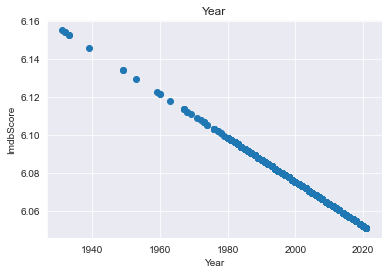

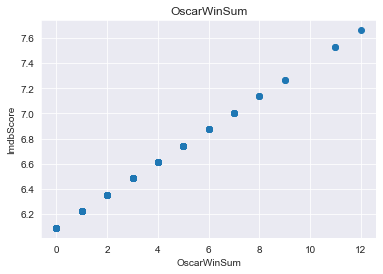

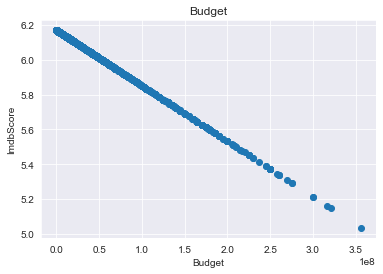

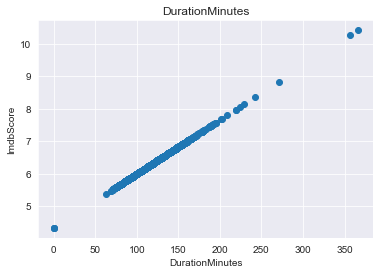

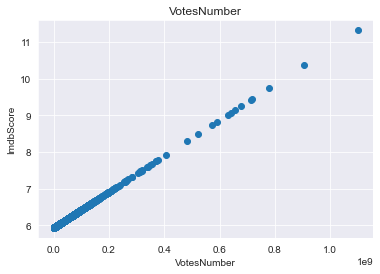

In [35]:
import matplotlib.pyplot as plt

columnsDisplay = ['Year', 'OscarWinSum', 'Budget', 'DurationMinutes', 'VotesNumber'] # 'NominatedNumber', 'Gross'

fixedValue = X.iloc[0]

fixed_df = X.copy(deep = True)
for column in X.columns:
    fixed_df[column] = fixedValue[column]

print(fixed_df.info())

for column in columnsDisplay:
    fixed_with_column = fixed_df.copy(deep = True)
    fixed_with_column[column] = X[column]
    yPred = LinReg.predict(fixed_with_column)
    plt.figure()
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('ImdbScore')
    plt.scatter(fixed_with_column[column], yPred)
    plt.show()

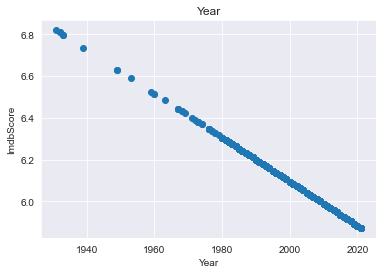

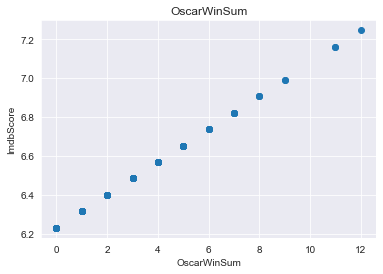

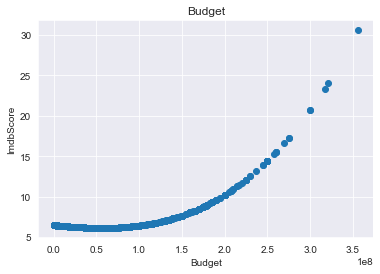

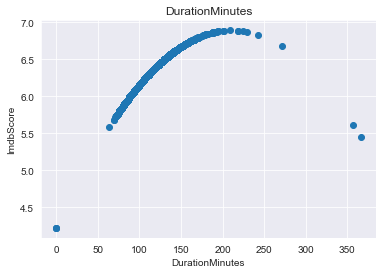

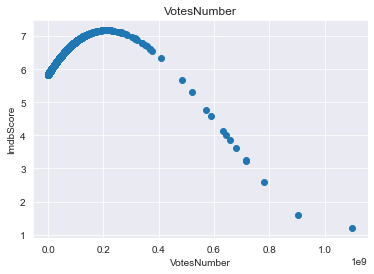

In [36]:
for column in columnsDisplay:
    fixed_with_column = fixed_df.copy(deep = True)
    fixed_with_column[column] = X[column]
    yPred = PolReg3.predict(fixed_with_column)
    plt.figure()
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('ImdbScore')
    plt.scatter(fixed_with_column[column], yPred)
    plt.show()

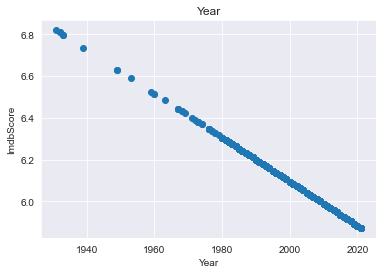

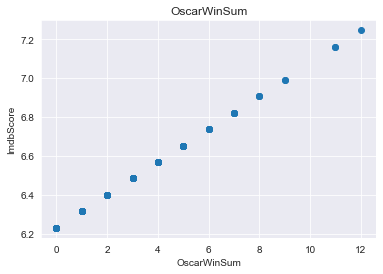

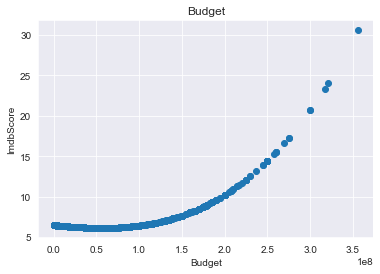

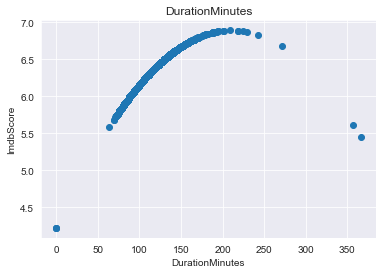

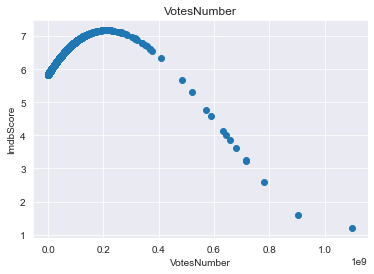

In [37]:
for column in columnsDisplay:
    fixed_with_column = fixed_df.copy(deep = True)
    fixed_with_column[column] = X[column]
    yPred = PolReg3.predict(fixed_with_column)
    plt.figure()
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('ImdbScore')
    plt.scatter(fixed_with_column[column], yPred)
    plt.show()

In [38]:
from sklearn.preprocessing import StandardScaler


sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(Y)


X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_std, y_std, test_size=0.3, random_state=0)

X_train_scaled.std(), X_train_scaled.mean()

(0.9801069621167303, 0.00043295885153706997)

In [39]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train_scaled)
y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)
print(lasso.coef_)

print('R^2 test: {:.3f}'.format(r2_score(y_test_scaled, y_test_pred)))

[ 0.          0.03722649 -0.          0.24470661  0.04927168  0.
  0.          0.07240761  0.00156747  0.00059105 -0.0010396   0.
  0.03169414  0.02154345  0.          0.          0.08468493  0.
 -0.          0.         -0.          0.         -0.          0.
  0.          0.         -0.          0.          0.         -0.
  0.         -0.          0.          0.          0.          0.
 -0.          0.          0.          0.         -0.         -0.
  0.          0.          0.          0.          0.          0.        ]
R^2 test: 0.229


In [40]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train_scaled)
y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)
print(ridge.coef_)

print('R^2 test: {:.3f}'.format(r2_score(y_test_scaled, y_test_pred)))

[[ 1.65321254e-03  7.06750390e-02 -1.71829073e-01  3.27441230e-01
   2.35716599e-01 -9.70283361e-02  8.43828357e-04  1.38173086e-01
   2.03615454e-02  2.00420072e-01 -7.89077309e-02  6.22436614e-02
   1.69623022e-01  9.80526507e-02  6.75419272e-02  3.18199720e-02
   1.34942785e-01  3.04506772e-02 -5.55295973e-03  2.03775660e-02
  -5.48507587e-03 -2.68500962e-02 -1.50228370e-01  6.35759407e-03
   1.26933625e-02  5.19669721e-03 -5.48507587e-03  4.02432928e-02
   2.03775660e-02 -5.48507587e-03  1.97744180e-02 -5.48507587e-03
   1.27744520e-02  3.47703734e-03  6.09910830e-03  1.24075194e-02
   1.84498907e-03  1.66249016e-02  3.01627519e-27 -2.20204122e-03
  -3.08933744e-02 -3.03970761e-02  7.27835995e-03  4.22644566e-02
   7.01478946e-03  1.21311311e-02  1.40265397e-02  2.32783246e-02]]
R^2 test: 0.338


c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


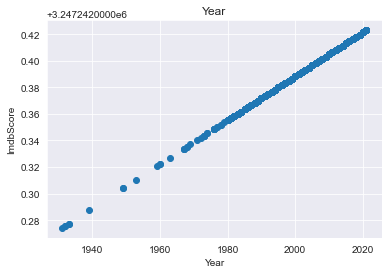

c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


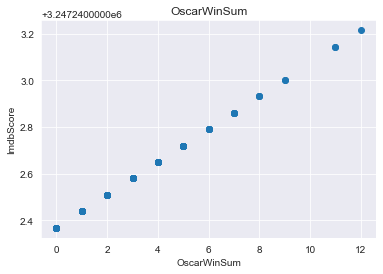

c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


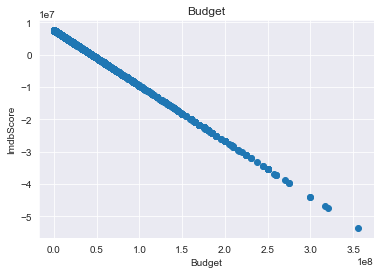

c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


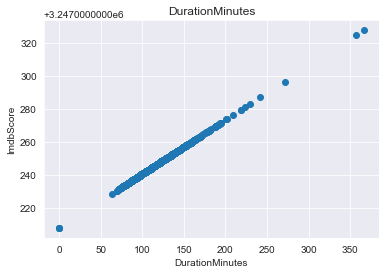

c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


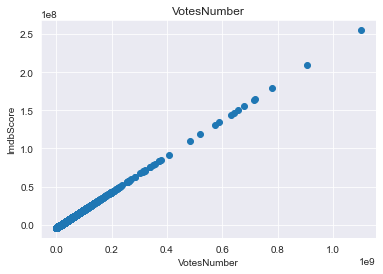

In [41]:
for column in columnsDisplay:
    fixed_with_column = fixed_df.copy(deep = True)
    fixed_with_column[column] = X[column]
    RidgePred = ridge.predict(fixed_with_column)
    plt.figure()
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('ImdbScore')
    plt.scatter(fixed_with_column[column], RidgePred)
    plt.show()

In [42]:
from sklearn.linear_model import ElasticNet

en = ElasticNet(alpha=0.1, l1_ratio=0.5)
en.fit(X_train_scaled, y_train_scaled)
y_train_pred = en.predict(X_train_scaled)
y_test_pred = en.predict(X_test_scaled)
print(en.coef_)

print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train_scaled, y_train_pred),
        r2_score(y_test_scaled, y_test_pred)))

[ 0.          0.05668052 -0.00732535  0.25020181  0.12203431  0.
  0.          0.08745092  0.01648308  0.07614242 -0.05963213  0.
  0.07373586  0.0528941   0.          0.          0.1002152   0.
 -0.          0.         -0.         -0.         -0.0695878   0.
  0.          0.         -0.          0.          0.         -0.
  0.         -0.          0.          0.          0.          0.
  0.          0.         -0.         -0.         -0.         -0.01024824
  0.          0.00923407  0.          0.          0.          0.        ]
R^2 train: 0.278, test: 0.297
